In [0]:
import os

from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, GlobalMaxPooling1D


In [0]:
 import re
import pandas as pd
import numpy as np


In [0]:
!pip install nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [0]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [0]:
!pip install seaborn

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/MeghnaDM/Data-Science/master/ep_train.csv'
df = pd.read_csv(url)
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [0]:
df.shape

(7920, 3)

In [0]:
#word count for each tweet
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,13
1,Finally a transparant silicon case ^^ Thanks t...,17
2,We love this! Would you go? #talk #makememorie...,15
3,I'm wired I know I'm George I was made that wa...,17
4,What amazing service! Apple won't even talk to...,23


In [0]:
#character count 
df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,Finally a transparant silicon case ^^ Thanks t...,131
2,We love this! Would you go? #talk #makememorie...,123
3,I'm wired I know I'm George I was made that wa...,112
4,What amazing service! Apple won't even talk to...,124


In [0]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,8.923077
1,Finally a transparant silicon case ^^ Thanks t...,6.764706
2,We love this! Would you go? #talk #makememorie...,7.266667
3,I'm wired I know I'm George I was made that wa...,5.647059
4,What amazing service! Apple won't even talk to...,4.434783


In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['tweet','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,stopwords
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0
1,Finally a transparant silicon case ^^ Thanks t...,3
2,We love this! Would you go? #talk #makememorie...,1
3,I'm wired I know I'm George I was made that wa...,2
4,What amazing service! Apple won't even talk to...,9


In [0]:
#counting number of hashtags in each tweet
df['hastags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['tweet','hastags']].head()

,tweet,hastags
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,11
1,Finally a transparant silicon case ^^ Thanks t...,5
2,We love this! Would you go? #talk #makememorie...,8
3,I'm wired I know I'm George I was made that wa...,4
4,What amazing service! Apple won't even talk to...,0


In [0]:
#number of numerics
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['tweet','numerics']].head()

,tweet,numerics
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0
1,Finally a transparant silicon case ^^ Thanks t...,0
2,We love this! Would you go? #talk #makememorie...,0
3,I'm wired I know I'm George I was made that wa...,0
4,What amazing service! Apple won't even talk to...,0


In [0]:
#number of uppercase
df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['tweet','upper']].head()

,tweet,upper
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0
1,Finally a transparant silicon case ^^ Thanks t...,1
2,We love this! Would you go? #talk #makememorie...,0
3,I'm wired I know I'm George I was made that wa...,2
4,What amazing service! Apple won't even talk to...,2


In [0]:
df.id.unique()

array([   1,    2,    3, ..., 7918, 7919, 7920])

In [0]:
df = df.drop(labels=['id'],axis=1)

In [0]:
#converting to lowercase
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [0]:
print(df.isnull().sum())

label         0
tweet         0
word_count    0
char_count    0
avg_word      0
stopwords     0
hastags       0
numerics      0
upper         0
dtype: int64


In [0]:
#removing punctuation
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet'].head()

0    fingerprint pregnancy test httpsgooglh1mfqv an...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [0]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()

0    fingerprint pregnancy test httpsgooglh1mfqv an...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [0]:
#most occured words
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:5]
freq

iphone     3757
apple      2853
samsung    1406
new        1141
phone       955
dtype: int64

In [0]:
#rare words
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[-10:]
freq

httpinstagrampu53g_vju8                                                                            1
rainydayz                                                                                          1
sfree                                                                                              1
httpinstagramptrjf_7eqgn                                                                           1
httpzetasuppliescoukproductsziphoodieutm_campaignsocial_autopilotutm_sourcetweetutm_mediumtweet    1
httpinstagrampwnrtwmrqd2                                                                           1
cowen                                                                                              1
floradesign                                                                                        1
kinkakuji                                                                                          1
httpsyoutubebnegqk9fu5s                                                                    

In [0]:
#spelling correction
from textblob import TextBlob
df['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    fingerprint pregnancy test httpsgooglh1mfqv an...
1    finally transparent silicon case thanks uncle ...
2    love would go talk makememories plug relax pho...
3    in wired know in george made way phone cut cov...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

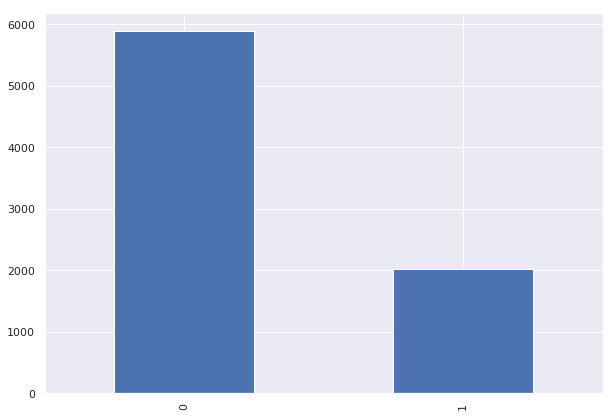

In [0]:
#df.label.value_counts()

plt.figure(figsize=(10,7))
df.label.value_counts().plot(kind='bar');

In [0]:
from textblob import TextBlob

In [0]:
#blob1= TextBlob.df['tweet'][0]
#print(blob1.sentiment)

AttributeError: ignored

In [0]:
url_test = 'https://raw.githubusercontent.com/MeghnaDM/Data-Science/master/ep_test.csv'
df_test = pd.read_csv(url_test)
df_test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [0]:
df_test.shape

(1953, 2)

In [0]:
df_test.id.unique()

array([7921, 7922, 7923, ..., 9871, 9872, 9873])

In [0]:
df_test = df_test.drop(labels=['id'],axis=1)

In [0]:
df_test.head()

,tweet
0,I hate the new #iphone upgrade. Won't let me d...
1,currently shitting my fucking pants. #apple #i...
2,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,My ipod is officially dead. I lost all my pict...
4,Been fighting iTunes all night! I only want th...


In [0]:
df_test_tweet = df_test['tweet']

In [0]:
# define documents
    docs = []
    labels =[]
    docs_test =[]
    for row in df['tweet']:
        docs.append(row)
    for row_1 in df['label']:
        labels.append(row_1)
    for row_t in df_test_tweet:
        docs_test.append(row)

In [0]:
print(docs[0:5])
print(labels[0:5])
print(df_test_tweet[0:5])

['fingerprint pregnancy test httpsgooglh1mfqv android apps beautiful cute health igers iphoneonly iphonesia iphone', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget5jc6jm', 'love would go talk makememories unplug relax iphone smartphone wifi connect httpfbme6n3lsupcu', 'im wired know im george made way iphone cute daventry home httpinstagrampli_5_ujs4k', 'amazing service apple wont even talk question unless pay 1995 stupid support']
[0, 0, 0, 0, 1]
0    I hate the new #iphone upgrade. Won't let me d...
1    currently shitting my fucking pants. #apple #i...
2    I'd like to puts some CD-ROMS on my iPad, is t...
3    My ipod is officially dead. I lost all my pict...
4    Been fighting iTunes all night! I only want th...
Name: tweet, dtype: object


In [0]:
maxlength = len(df.tweet)
maxlength

7920

In [0]:
#tokenization
t = Tokenizer()
t.fit_on_texts(docs)

vocab_size = len(t.word_index) + 1
print (vocab_size)
print(t.word_index)

22970
{'iphone': 1, 'apple': 2, 'samsung': 3, 'new': 4, 'phone': 5, 'sony': 6, 'follow': 7, 'ipad': 8, 'like': 9, 'love': 10, 'life': 11, 'android': 12, 'rt': 13, 'day': 14, 'instagram': 15, 'cute': 16, 'photo': 17, 'im': 18, 'gain': 19, 'today': 20, 'photography': 21, 'get': 22, 'back': 23, 'galaxy': 24, 'fun': 25, 'got': 26, 'case': 27, 'news': 28, 'music': 29, 'ios': 30, 'instagood': 31, 'app': 32, 'happy': 33, 'beautiful': 34, 'funny': 35, 'time': 36, 'fashion': 37, 'lol': 38, 'smile': 39, 'one': 40, 'itunes': 41, 'tech': 42, 'birthday': 43, 'work': 44, 'iphonex': 45, 'ipod': 46, 'photooftheday': 47, 'finally': 48, 'cant': 49, 'twitter': 50, 'good': 51, 'everyone': 52, 'amazing': 53, 'make': 54, 'girl': 55, 'apps': 56, 'dont': 57, 'must': 58, 'sougofollow': 59, '3': 60, 'update': 61, 'selfie': 62, 'mac': 63, 'followers': 64, 'fail': 65, 'thanks': 66, 'free': 67, 'rts': 68, 'igers': 69, 'would': 70, 'home': 71, 'friends': 72, '2': 73, 'fuck': 74, 'hate': 75, 'want': 76, 'iphonesia':

In [0]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    fingerprint pregnanc test httpsgooglh1mfqv and...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [0]:
#trigram
!pip3 install -U textblob
!python3 -m textblob.download_corpora
TextBlob(df['tweet'][0]).ngrams(3)

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[WordList(['fingerprint', 'pregnancy', 'test']),
 WordList(['pregnancy', 'test', 'httpsgooglh1mfqv']),
 WordList(['test', 'httpsgooglh1mfqv', 'android']),
 WordList(['httpsgooglh1mfqv', 'android', 'apps']),
 WordList(['android', 'apps', 'beautiful']),
 WordList(['apps', 'beautiful', 'cute']),
 WordList(['beautiful', 'cute', 'health']),
 WordList(['cute', 'health', 'igers']),
 WordList(['health', 'igers', 'iphoneonly']),
 WordList(['igers', 'iphoneonly', 'iphonesia']),
 WordList(['iphoneonly', 'iphonesia', 'iphone'])]

In [0]:
#import nltk
#from nltk import bigrams
#df2 = bigrams(df)
#df2

<generator object bigrams at 0x7f5e48e32fc0>

In [0]:
#tf
tf1 = (df['tweet'][0:3]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,apps,1.0
1,health,1.0
2,cute,1.0
3,igers,1.0
4,iphone,2.0
5,httpsgooglh1mfqv,1.0
6,iphonesia,1.0
7,pregnancy,1.0
8,test,1.0
9,iphoneonly,1.0


In [0]:
#POStags
from textblob import TextBlob
result = TextBlob(df['tweet'][0])
print(result.tags)

[('fingerprint', 'NN'), ('pregnancy', 'NN'), ('test', 'NN'), ('httpsgooglh1mfqv', 'NN'), ('android', 'NN'), ('apps', 'NN'), ('beautiful', 'JJ'), ('cute', 'JJ'), ('health', 'NN'), ('igers', 'NNS'), ('iphoneonly', 'RB'), ('iphonesia', 'VBP'), ('iphone', 'NN')]


In [0]:
#encoding the docs
encoded_docs = t.texts_to_sequences(docs)
encoded_docs_Test = t.texts_to_sequences(df_test_tweet)

In [0]:
#padding docs
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_Test = pad_sequences(encoded_docs_Test, maxlen=max_length, padding='post')
print(padded_docs[0:5])

[[2137 6405 1229 ...    0    0    0]
 [  48 6407 4094 ...    0    0    0]
 [  10   70   88 ...    0    0    0]
 [  18 2138  114 ...    0    0    0]
 [  53  304    2 ...    0    0    0]]


In [0]:
labels = to_categorical(np.asarray(labels))

In [0]:
#Performing train test split on the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=0)  #, stratify = labels
print(type(X_train))
print(type( X_test))
print(type(y_train))
print(type( y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
print(X_train.shape)
#X_train
print(X_test.shape)
#X_test
print(y_train.shape)
#y_train
print(y_test.shape)
#y_test

(6336, 500)
(1584, 500)
(6336, 2)
(1584, 2)


In [0]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))
#model.add(Flatten())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
#model.add(Activation('softmax'))

In [0]:
#compile the model
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(loss='binary_crossentropy',
          optimizer= 'adam',
          metrics=[f1])





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           1148500   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50002     
Total params: 1,198,502
Trainable params: 1,198,502
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4,verbose=1)


Train on 6336 samples, validate on 1584 samples
Epoch 1/4
6336/6336 [==============================] - 5s 752us/step - loss: 0.4431 - f1: 0.7876 - val_loss: 0.3011 - val_f1: 0.8554
Epoch 2/4
6336/6336 [==============================] - 4s 631us/step - loss: 0.1915 - f1: 0.9242 - val_loss: 0.2697 - val_f1: 0.8756
Epoch 3/4
6336/6336 [==============================] - 4s 643us/step - loss: 0.0968 - f1: 0.9699 - val_loss: 0.2769 - val_f1: 0.8819
Epoch 4/4
6336/6336 [==============================] - 4s 633us/step - loss: 0.0475 - f1: 0.9901 - val_loss: 0.2922 - val_f1: 0.8782


In [0]:
# evaluate the model
loss, f1 = model.evaluate(X_test, y_test, verbose=0)
print('f1_score: %f' % (f1*100))

f1_score: 87.815651


In [0]:
Y_pred_test = model.predict(X_test)
print(Y_pred_test[0:5])

[[0.99808276 0.00191729]
 [0.02502315 0.97497684]
 [0.97232157 0.02767846]
 [0.5440704  0.4559296 ]
 [0.9285942  0.07140579]]


In [0]:
y_pred_Test =[]
for i in Y_pred_test:
    y_pred_Test.append(np.argmax(i))

print(y_pred_Test)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 

In [0]:
Y_pred = model.predict(padded_docs_Test)
print(Y_pred[0:5])

[[0.03706381 0.96293616]
 [0.26016277 0.7398373 ]
 [0.36134422 0.6386558 ]
 [0.5275741  0.4724259 ]
 [0.7444728  0.25552723]]


In [0]:
type(Y_pred)

numpy.ndarray

In [0]:

y_pred =[]
for i in Y_pred:
    y_pred.append(np.argmax(i))

print(y_pred)

[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['tweet'] = labelencoder.fit_transform(df['tweet'])
op =labelencoder.inverse_transform(y_pred)
d = {'tweet': df_test['tweet'], 'labels': op}
df1 = pd.DataFrame(data=d)
df1.head(7)

,tweet,labels
0,I hate the new #iphone upgrade. Won't let me d...,011 definitely doesnt driver license whathe be...
1,currently shitting my fucking pants. #apple #i...,011 definitely doesnt driver license whathe be...
2,"I'd like to puts some CD-ROMS on my iPad, is t...",011 definitely doesnt driver license whathe be...
3,My ipod is officially dead. I lost all my pict...,004 happy ied mubarrak one day one chord progr...
4,Been fighting iTunes all night! I only want th...,004 happy ied mubarrak one day one chord progr...
5,#Repost @getbakednfried with repostapp ・・・ to ...,004 happy ied mubarrak one day one chord progr...
6,This new apple software update is really doing...,011 definitely doesnt driver license whathe be...


In [0]:

from google.colab import files
df1.to_csv('pred1_ep1.csv') 
files.download('pred1_ep1.csv')

In [0]:
#with dropout
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))
model.add(Activation('tanh'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))


In [0]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
  
  
 

In [0]:
model.compile(loss='binary_crossentropy',optimizer= 'adam',metrics=[f1])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 50)           1148500   
_________________________________________________________________
activation_19 (Activation)   (None, 500, 50)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 50002     
_________________________________________________________________
activation_20 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                

In [0]:
import keras as keras
from keras.callbacks import Callback
mc = keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=5)
fig = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2,verbose=1, callbacks=[mc])

Train on 6336 samples, validate on 1584 samples
Epoch 1/2
6336/6336 [==============================] - 9s 1ms/step - loss: 0.5687 - f1: 0.7443 - val_loss: 0.5692 - val_f1: 0.7437
Epoch 2/2
6336/6336 [==============================] - 9s 1ms/step - loss: 0.5687 - f1: 0.7443 - val_loss: 0.5692 - val_f1: 0.7437


In [0]:
loss, f1 = model.evaluate(X_test, y_test, verbose=1)
print('f1_score: %f' % (f1*100))

1584/1584 [==============================] - 0s 81us/step
f1_score: 74.368681


In [0]:
Y_pred_2 = model.predict(padded_docs_Test)
print(Y_pred_2[0:5])

[[0.74356717 0.25643286]
 [0.74356717 0.2564329 ]
 [0.74356717 0.25643286]
 [0.74356705 0.25643292]
 [0.74356717 0.2564329 ]]


In [0]:
y_pred_22 =[]
for i in Y_pred_2:
    y_pred_22.append(np.argmax(i))

print(y_pred_22)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
op_2 =labelencoder.inverse_transform(y_pred_22)
d_2 = {'tweet': df_test['tweet'], 'labels': op_2}
df_2 = pd.DataFrame(data=d_2)
df_2.head(10)

,tweet,labels
0,I hate the new #iphone upgrade. Won't let me d...,0
1,currently shitting my fucking pants. #apple #i...,0
2,"I'd like to puts some CD-ROMS on my iPad, is t...",0
3,My ipod is officially dead. I lost all my pict...,0
4,Been fighting iTunes all night! I only want th...,0
5,#Repost @getbakednfried with repostapp ・・・ to ...,0
6,This new apple software update is really doing...,0
7,BABY #iPhone #iphone6s #gold #new #apple #appl...,0
8,I'm confused...why did I have to take the time...,0
9,Fruit just tastes better when you pick it your...,0


In [0]:

from google.colab import files
df_2.to_csv('pred2_dropout_ep.csv') 
files.download('pred2_dropout_ep.csv')

In [0]:
#random forest model
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, random_state=0)
classifier.fit(X_train, y_train)





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)
print(y_pred[0:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [0]:
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
cm
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
print(f1_score(y_test.argmax(axis=1),y_pred.argmax(axis=1)))

0.42314049586776864


In [0]:
try:
    import dill as pickle
except ImportError:
    import pickle


with open('text_classifier', 'wb') as picklefile:
    pickle.dump(classifier,picklefile)

In [0]:
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [0]:
y_pred2 = model.predict(X_test)

print(confusion_matrix(y_test.argmax(axis=1),y_pred2.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1),y_pred2.argmax(axis=1)))
print(f1_score(y_test.argmax(axis=1),y_pred2.argmax(axis=1)))

[[1107   71]
 [ 278  128]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1178
           1       0.64      0.32      0.42       406

    accuracy                           0.78      1584
   macro avg       0.72      0.63      0.64      1584
weighted avg       0.76      0.78      0.75      1584

0.42314049586776864


In [0]:
embedding_dim = 32

model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=max_length))
model2.add(layers.GlobalMaxPool1D())
#model2.add(Dropout(0.5))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(2, activation='softmax'))


In [0]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
  
  
 

In [0]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           735040    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 735,322
Trainable params: 735,322
Non-trainable params: 0
_________________________________________________________________
